# Visualization of Intermediate Layer Activations

In [1]:
import keras
keras.__version__
from keras.models import load_model
from keras.models import model_from_json
import numpy
import numpy as np
import os
from keras.models import Model
from keras.models import load_model
import keras
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt
from keras.layers import Input


Using TensorFlow backend.


In [2]:
import tensorflow as tf 
model = tf.keras.models.load_model('/home/gitanjali/Desktop/Deep_learning/DL_2020/assignment1/Q3_PART2_Line_dataset_variation2_saveas_with_architecture.h5')
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 16)        104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               4

In [3]:
img_path = "/home/gitanjali/Desktop/Deep_learning/DL_2020/assignment1/line_data/Class20/1_1_4_0_0.jpg"

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 28, 28, 3)


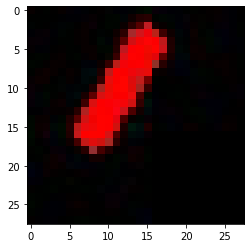

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [5]:
from keras import models
layer_outputs=model.layers[4].output

# Creates a model that will return these outputs, givesn the model input:
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)
print(activation_model.inputs)
print(activation_model.layers[4].output)


[<tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 3) dtype=float32>]
Tensor("conv2d_1/Identity:0", shape=(None, 11, 11, 32), dtype=float32)


In [6]:
activations = activation_model.predict(img_tensor)
print(activations.shape)

(1, 5, 5, 32)


In [7]:
first_layer_activation = activations[:2]
print(first_layer_activation.shape)

(1, 5, 5, 32)


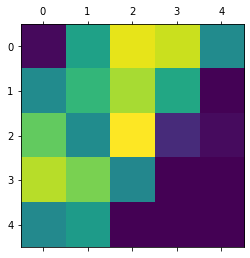

In [8]:
# lets try tio visualize the 3rd channel
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')
plt.show()